In [32]:
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
import matplotlib.pyplot as plt

In [2]:
max_features = 10000 
maxlen = 500  

In [5]:
# Charger les donnees d'entrainement et de test
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)




In [11]:
# Afficher un exemple de sequence d'entrainement et son étiquette
print("Exemple de séquence d'entrainement :", x_train[0])
print("Label associé :", y_train[0])

# Afficher un autre exemple
print("\nExemple de séquence d'entraînement :", x_train[1])
print("Label associé :", y_train[1])


Exemple de séquence d'entrainement : [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Label associé : 1

Exem

In [13]:
# Appliquer le padding sur les séquences
x_train_pad = pad_sequences(x_train, maxlen=maxlen)
x_test_pad = pad_sequences(x_test, maxlen=maxlen)

print(f"Dimensions de x_train_pad après padding: {x_train_pad.shape}")
print(f"Dimensions de x_test_pad après padding: {x_test_pad.shape}")


Dimensions de x_train_pad après padding: (25000, 500)
Dimensions de x_test_pad après padding: (25000, 500)


In [17]:
# Construction du modèle RNN
model = Sequential()

# Ajouter la couche d'Embedding pour convertir les mots en vecteurs
model.add(Embedding(input_dim=max_features, output_dim=128, input_length=maxlen))

# Ajouter la couche SimpleRNN avec 128 unités
model.add(SimpleRNN(units=128, activation='tanh'))

# Ajouter la couche Dense pour la classification (sigmoid pour la classification binaire)
model.add(Dense(1, activation='sigmoid'))  # Pour une classification binaire

C:\Users\Hp\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [29]:
# Compilation du modèle
model.compile(
    optimizer='adam',          
    loss='binary_crossentropy', 
    metrics=['accuracy']       
)

In [31]:
history = model.fit(
    x_train_pad,                
    y_train,                
    epochs=10,             
    batch_size=32,          
    validation_split=0.2,   
    verbose=1              
)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 110ms/step - accuracy: 0.9157 - loss: 0.2179 - val_accuracy: 0.7694 - val_loss: 0.5764
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 70s 112ms/step - accuracy: 0.9156 - loss: 0.2192 - val_accuracy: 0.7736 - val_loss: 0.6052
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 70s 113ms/step - accuracy: 0.9539 - loss: 0.1399 - val_accuracy: 0.7198 - val_loss: 0.6432
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 73s 117ms/step - accuracy: 0.9101 - loss: 0.2338 - val_accuracy: 0.7898 - val_loss: 0.6569
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 118ms/step - accuracy: 0.9595 - loss: 0.1225 - val_accuracy: 0.7836 - val_loss: 0.6695
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 118ms/step - accuracy: 0.9702 - loss: 0.0915 - val_accuracy: 0.7934 - val_loss: 0.7349
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 118ms/step - accuracy: 0.8550 - loss: 0.3080 - val_accuracy: 0.6962 - val_loss: 0.6580
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 118ms/step - accuracy: 0.8671 - loss: 0

In [39]:
test_loss, test_accuracy = model.evaluate(x_test_pad, y_test)

print(f"Perte sur les données de test: {test_loss}")
print(f"Précision sur les données de test: {test_accuracy}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.7673 - loss: 0.7370
Perte sur les données de test: 0.7265751361846924
Précision sur les données de test: 0.7690399885177612


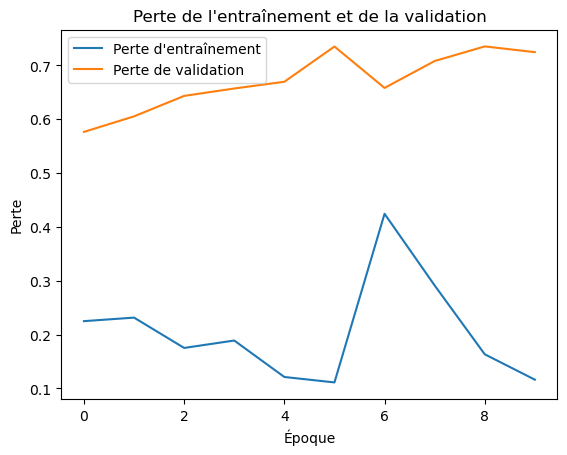

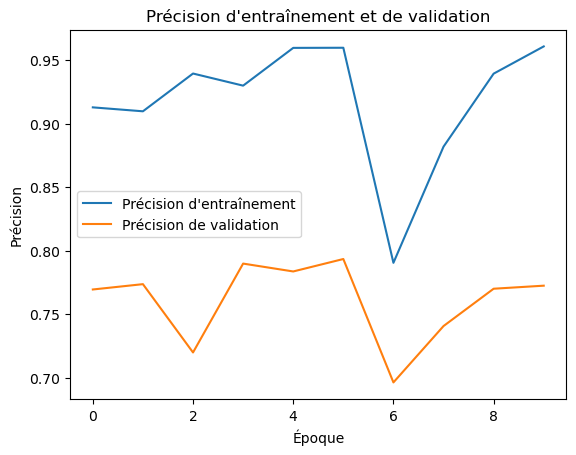

In [41]:
#loss
plt.plot(history.history['loss'], label='Perte d\'entraînement')
plt.plot(history.history['val_loss'], label='Perte de validation')
plt.title('Perte de l\'entraînement et de la validation')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.legend()
plt.show()

#accuracy
plt.plot(history.history['accuracy'], label='Précision d\'entraînement')
plt.plot(history.history['val_accuracy'], label='Précision de validation')
plt.title('Précision d\'entraînement et de validation')
plt.xlabel('Époque')
plt.ylabel('Précision')
plt.legend()
plt.show()


In [45]:
# Prédire les résultats sur les données de test
predictions = model.predict(x_test_pad)

782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 32ms/step
